In [12]:
import numpy as np
import matplotlib.pyplot as plt

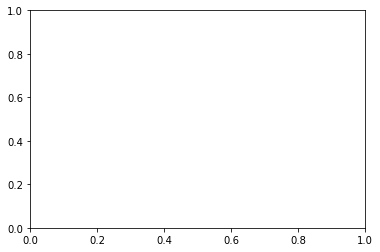

In [63]:
class Line(object):
    def __init__(self,start:tuple,end:tuple):
        self.startX=start[0]
        self.startY=start[1]
        
        self.endX=end[0]
        self.endY=end[1]
        
        self.slope=(self.endY-self.startY)/(self.endX-self.startX)
        print(self.slope)
    def contains(self,sensor_loc,thresh=10):
        """
        determine whether the sensor array will "see" this array
        sensor array consists of a section of points, X and Y
        
        sensor_loc is a dict with 4 values
        x1,y1,x2,y2 which define the size and location of the sensor array
        
        if it does, it returns the location along the array,
        otherwise returns None
        """
        #sensor is a line, calculate its slope
        sensorSlope=(sensor_loc["y2"]-sensor_loc["y1"])/(sensor_loc["x2"]-sensor_loc["x1"])
                                                          
        #find the x intercept between these two lines, 
        #we have sensorSlope*(x-sensor_loc["x1"])+sensor_loc["y1"]=lineSlope(x-startX)+startY
                                                         
                                                         
        x_intercept=(self.startY-sensor_loc["y1"]-self.startX*self.slope+sensor_loc["x1"]*sensorSlope)/\
                                                       (sensorSlope-self.slope)
        print(x_intercept)
        print(sensorSlope*(x_intercept-sensor_loc["x1"])+sensor_loc["y1"])
        print(self.slope*(x_intercept-self.startX)+self.startY)
        #if x_intercept is in the correct range
        #check if the x_intercept is in the range of this line
        if x_intercept<max(self.endX,self.startX) and x_intercept>min(self.endX,self.startX):
            if x_intercept<max(sensor_loc["x2"],sensor_loc["x1"]) and x_intercept>min(sensor_loc["x2"],sensor_loc["x1"]):
                return x_intercept, sensorSlope*(x_intercept-sensor_loc["x1"])+sensor_loc["y1"]
        return None
    
    def draw(self,ax=plt.gca()):
        print([self.startX,self.endX])
        plt.plot([self.startX,self.endX],[self.startY,self.endY])
        
        

In [64]:
l=Line((0,1),(4,5))

1.0


[0, 4]


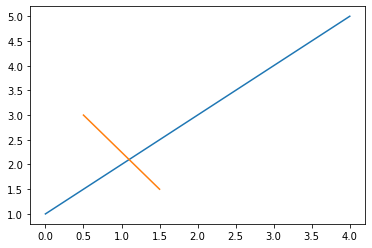

In [65]:
l.draw()
plt.plot([0.5,1.5],[3,1.5])

In [66]:
print(l.contains({"x1":0.5,"x2":1.5,
           "y1":3,"y2":1.5}))

1.1
2.0999999999999996
2.1
(1.1, 2.0999999999999996)
